水増し前 240
水増し後 5760
Epoch 1/20
36/36 [==============================] - 6s 177ms/step - loss: 0.9646 - accuracy: 0.5866 - val_loss: 0.6407 - val_accuracy: 0.7000
Epoch 2/20
36/36 [==============================] - 6s 169ms/step - loss: 0.6388 - accuracy: 0.7675 - val_loss: 0.9171 - val_accuracy: 0.6167
Epoch 3/20
36/36 [==============================] - 6s 176ms/step - loss: 0.4764 - accuracy: 0.8262 - val_loss: 0.3677 - val_accuracy: 0.9333
Epoch 4/20
36/36 [==============================] - 14s 383ms/step - loss: 0.3439 - accuracy: 0.8835 - val_loss: 0.5187 - val_accuracy: 0.8333
Epoch 5/20
36/36 [==============================] - 16s 454ms/step - loss: 0.2989 - accuracy: 0.8988 - val_loss: 0.4814 - val_accuracy: 0.8500
Epoch 6/20
36/36 [==============================] - 12s 344ms/step - loss: 0.2276 - accuracy: 0.9168 - val_loss: 0.4493 - val_accuracy: 0.8833
Epoch 7/20
36/36 [==============================] - 6s 176ms/step - loss: 0.1732 - accuracy: 0.9434 - val_loss: 0.8093 - val_a

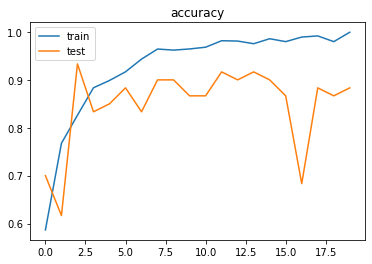

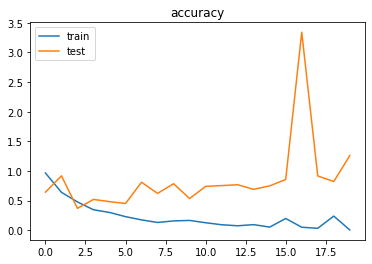

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
import keras
import cv2
import cnn_model
import matplotlib.pyplot as plt


photos = './image/photos.npz'
data = np.load(photos)
x = data['x']
y = data['y']

im_ro = 32
im_wi = 32
im_co = 3
nd_class = 3
in_sh = (im_ro, im_wi, im_co)

x = x.reshape(-1, im_ro, im_wi, im_co)
x = x.astype('float32') / 255
y = keras.utils.to_categorical(y, nd_class)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


x_new = []
y_new = []
for i, x_im in enumerate(x_train):
    y_t = y_train[i]
    for k in range(-30, 30, 5):
        center = (16, 16)
        scale = 1.0
        im = cv2.getRotationMatrix2D(center, k, scale)
        im2 = cv2.warpAffine(x_im, im, (32,32))
        x_new.append(im2)
        y_new.append(y_t)
        
        fp = cv2.flip(im2, 1)
        x_new.append(fp)
        y_new.append(y_t)
        
print('水増し前', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後', len(y_train))
        
model = cnn_model.model_co(in_sh, nd_class)
hist = model.fit(x_train, y_train, batch_size= 160, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./image/model-weight.hdf5')